In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Fraud.csv to Fraud.csv


In [4]:
df=pd.read_csv("Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
print(df.isnull().sum()) # Check for missing values

df.info() # Check data types and info

df = pd.get_dummies(df, columns=['type'], drop_first=True) # Encode 'type'

df['bal_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] # Feature Engineering
df['bal_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest'] # Feature Engineering


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df= df.drop(['nameOrig', 'nameDest'], axis=1)

In [8]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,bal_diff_orig,bal_diff_dest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,-0.012918,0.002869,0.004926,0.006925,0.007255,0.001325
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,-0.004376,-0.023379,-0.197444,0.365896,0.102337,0.845964
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.200899,-0.021450,-0.189486,-0.081593,-0.220297,-0.087032
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.210977,-0.021872,-0.193915,-0.087355,-0.267750,-0.094456
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.086028,0.009347,-0.231455,0.130476,-0.047460,0.232316
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.093476,0.006346,-0.238315,0.191701,-0.006451,0.436191
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,0.011256,-0.002911,-0.025697,0.053869,0.362472,0.027028
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.001168,-0.000128,-0.001133,0.005245,0.000230,-0.000242
type_CASH_OUT,-0.012918,-0.004376,-0.200899,-0.210977,0.086028,0.093476,0.011256,-0.001168,1.000000,-0.059625,-0.526422,-0.222672,0.250010,0.062758
type_DEBIT,0.002869,-0.023379,-0.021450,-0.021872,0.009347,0.006346,-0.002911,-0.000128,-0.059625,1.000000,-0.057868,-0.024478,0.013645,-0.010400


<Axes: >

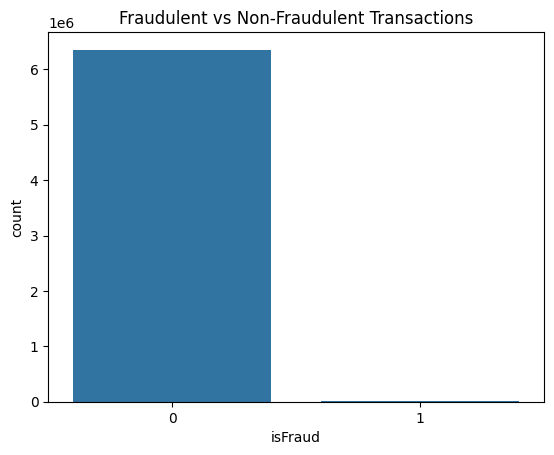

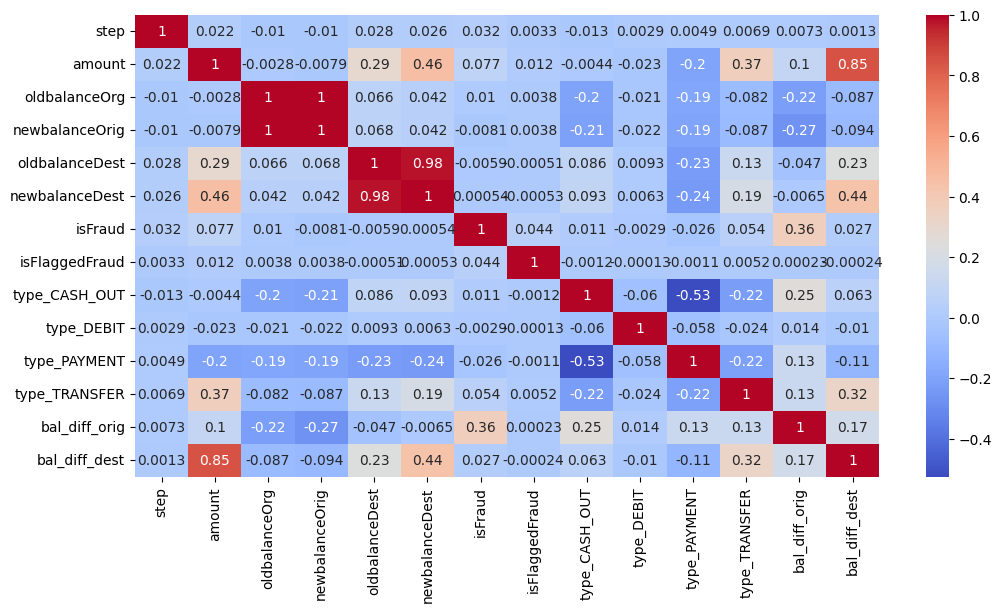

In [9]:
sns.countplot(x='isFraud', data=df) # Countplot
plt.title("Fraudulent vs Non-Fraudulent Transactions")

plt.figure(figsize=(12,6)) # Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [ ]:
# Features and target
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [1]:
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
feature_importance.plot(kind='bar', figsize=(12,6), title="Feature Importance")


NameError: name 'model' is not defined